In [1]:
from deepface import DeepFace
import cv2
import matplotlib.pyplot as plt

## Detection of image emotion

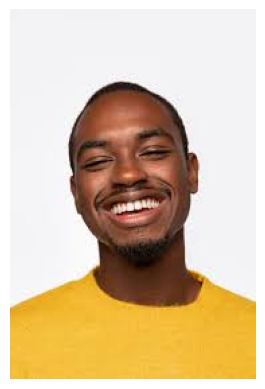

Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.73it/s]

Detected Emotion: happy
Detected Emotion: 25
Detected Emotion: {'Woman': 0.0012205276107124519, 'Man': 99.99878406524658}
Detected Emotion: black


In [110]:
img_path = "C:/Users/hu374/Downloads/images/happy.jpeg" # Replace with your image filename
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.axis('off')
plt.show()
result = DeepFace.analyze(img_path=img_path, actions=['emotion','age','gender','race'])
print("Detected Emotion:", result[0]['dominant_emotion'])
print("Detected Emotion:", result[0]['age'])
print("Detected Emotion:", result[0]['gender'])
print("Detected Emotion:", result[0]['dominant_race'])

In [47]:
result = DeepFace.analyze(img_path=img_path, actions=['emotion','age','gender','race'])
print("Detected Emotion:", result[0]['dominant_emotion'])
print("Detected Emotion:", result[0]['age'])
print("Detected Emotion:", result[0]['gender'])
print("Detected Emotion:", result[0]['dominant_race'])

Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.93it/s]

Detected Emotion: happy
Detected Emotion: 25
Detected Emotion: {'Woman': 0.0012205276107124519, 'Man': 99.99878406524658}
Detected Emotion: black


## WEBCAM Emotion detection

In [ ]:
import cv2
from deepface import DeepFace

# Start the webcam
cap = cv2.VideoCapture(0)

print("Press 'q' to quit...")

while True:
    ret, frame = cap.read()

    if not ret:
        print("Failed to grab frame")
        break

    # Resize frame for faster processing (optional)
    resized_frame = cv2.resize(frame, (640,480))

    try:
        # Analyze the frame for emotion
        result = DeepFace.analyze(img_path=resized_frame, actions=['emotion','age','gender','race'], enforce_detection=False)
        
        # Get dominant emotion
        emotion = result[0]['dominant_emotion']
        age = result[0]['age']
        gender = result[0]['gender']
        race = result[0]['dominant_race']
        
        
        # Display emotion on the frame
        cv2.putText(resized_frame, f'Emotion: {emotion}, Age:{age}, race:{race}', (20, 50),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1)
        cv2.putText(resized_frame, f'gender: {gender}', (20, 70),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1)
        
    except Exception as e:
        print("Detection error:", e)

    # Show the frame
    cv2.imshow("Real-Time Emotion Detection", resized_frame)

    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam
cap.release()
cv2.destroyAllWindows()


## Smooth frame detection

In [119]:
import cv2
from deepface import DeepFace

cap = cv2.VideoCapture(0)

frame_count = 0
detect_every_n_frames = 45  # Adjust this: lower = more frequent but slower

emotion, age, gender = "", "", ""

print("Press 'q' to quit...")

while True:
    ret, frame = cap.read()
    if not ret:
        print("Failed to grab frame")
        break

    resized_frame = cv2.resize(frame, (640, 480))

    # Run detection every N frames
    if frame_count % detect_every_n_frames == 0:
        try:
            result = DeepFace.analyze(
                img_path=resized_frame,
                actions=['emotion', 'age', 'gender'],
                enforce_detection=False,
                detector_backend='opencv'  # faster backend (optional)
            )
            emotion = result[0]['dominant_emotion']
            age = result[0]['age']
            gender = result[0]['gender']
        except Exception as e:
            print("Detection error:", e)

    # Show text (always visible, even between detections)
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 0.6
    thickness = 1

    cv2.putText(resized_frame, f'Emotion: {emotion}', (10, 30), font, font_scale, (0, 255, 0), thickness)
    cv2.putText(resized_frame, f'Age: {age}', (10, 55), font, font_scale, (255, 255, 0), thickness)
    cv2.putText(resized_frame, f'Gender: {gender}', (10, 80), font, font_scale, (255, 0, 255), thickness)

    cv2.imshow("Real-Time Detection", resized_frame)

    # Increment frame counter
    frame_count += 1

    # Exit on 'q' key
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


Press 'q' to quit...


Action: gender: 100%|████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  3.70it/s]
